In [39]:
#Bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


In [40]:
imagem = np.array([[0,1,1,2,1],[0,0,0,2,0],[0,2,2,0,0],[7,7,7,7,1]])

In [41]:
imagem

array([[0, 1, 1, 2, 1],
       [0, 0, 0, 2, 0],
       [0, 2, 2, 0, 0],
       [7, 7, 7, 7, 1]])

# [10] O plotar o histograma desta imagem.

In [42]:
import pandas as pd
def histogram (img):
    vector_img = np.array(img).flatten() # THIS FLATTEN FUNCTION WAS USED TO TRANSFORM THE MATRIX IMAGE INTO A VECTOR SO THAT WE COULD IDENTIFY THE OCCURRENCE OF A VALUE
    data = pd.value_counts (vector_img).sort_index() # WITH THIS FUNCTION THERE IS A DICTIONARY RETURN CONTAINING THE OCCURRENCE OF VALUES BY GRAY LEVELS IN THE IMAGE
    pixel = list (data.keys()) # DATA.KEYS RETURNS THE KEYS OF THE DICTIONARY THESE KEYS ARE THE GRAY LEVELS THAT CONTAIN IN THE IMAGE
    pixel_values = list (data.values) # THIS METHOD IS IN HOW MANY PIXELS OF THE IMAGE THERE ARE THAT GRAY LEVEL
    plt.bar (pixel, pixel_values) # THIS FUNCTION WAS USED TO PLOT THESE VALUES THE LIST OF ASH LEVELS ON THE X AXIS AND THE PIXELS VALUES THAT CONTAIN THESE ASH LEVELS
    plt.xlabel ('Gray image levels', fontsize = 18) # THIS FUNCTION WRITES A TEXT ON THE X AXIS
    plt.ylabel ('Number of pixels with these gray levels', fontsize = 16) # THIS FUNCAP WRITES A TEXT ON THE Y AXIS
    plt.show () # PLOT ALL ON SCREEN
    

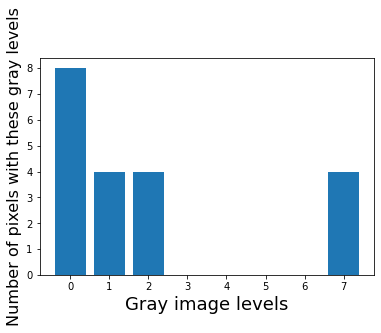

In [43]:
histogram(imagem)

# [10] Calculate the equalization of this image and display the graph of the histogram of the equalized image. Considering the cumulative distribution function (Show calculations)


In [44]:
from scipy.spatial import distance
import pandas as pd

def equalization(img):
    
    vector_img = np.array (img) .flatten () # THIS FLATTEN FUNCTION WAS USED TO TRANSFORM THE MATRIX IMAGE INTO A VECTOR SO THAT WE COULD IDENTIFY THE OCCURRENCE OF A VALUE
    data = pd.value_counts (vector_img) .sort_index () # WITH THIS FUNCTION THERE IS A DICTIONARY RETURN CONTAINING THE OCCURRENCE OF VALUES BY GRAY LEVELS IN THE IMAGE
    
    print ('DICTIONARY CONTAINING VALUE OF GRAY LEVELS AND ITS QUANTITY IN THE IMAGE \ n', data)
    
    # IN THIS PART I PRESTO THE QUANTITY OF ASH LEVELS AND THEIR RESPECTIVE QUANTITIES THAT MAKE UP THE IMAGE, WE CAN OBSERVE THAT ONLY THE VALUES APPEARED WITH QUANTITY GREATER THAN ZERO, THIS IS FOR
    # USE OF THE VALUE_COUNTS METHOD OF THE PANDAS LIBRARY THAT RETURNS US A DICTIONARY CONTAINING KEYS AND VALUES, AS PRINTED IN print (data)
    
    data = pd.DataFrame (data)
    for row in range (max (data [0] .keys ())): # IN THIS BLOCK I SOLVE THE PROBLEM THAT THE VALUE_COUNTS METHOD RETURNS DOES NOT RETURN THE ZERO VALUES OF THE IMAGE AS 3, 4 FOR EXAMPLE
        if row not in data [0] .keys ():
            data.loc [row] = 0
    #print (data)
    data = data.sort_index ()
    pixel = list (data [0] .keys ())
    # DATA.KEYS RETURNS THE KEYS OF THE DICTIONARY THESE KEYS ARE THE GRAY LEVELS THAT CONTAIN IN THE IMAGE
    levels_gray = [j / max (pixel) for j in range (0, len (pixel))]

    print ('GRAY LEVELS BY THE GREATEST GRAY LEVEL \ n', levels_gray)
    # GRAY LEVELS DIVIDED BY THE MAXIMUM VALUE OF GRAY LEVEL
    
    pixel_values = np.array (list (data [0] .values)) # THIS METHOD IS IN HOW MANY PIXELS OF THE IMAGE THERE ARE THAT GRAY LEVEL
    list_prob = [value / pixel_values.sum (axis = 0) for value in pixel_values] # IN THIS LINE WE MAKE THE PROBABILITY OF GRAY LEVELS WITH REGARD TO THE NUMBER OF PIXELS
    print ('IN THIS SITE WE RETURN THE PIXELS PROBABILITY LIST \ n', list_prob)
    equali_hist = []

    for line in range (0, len (list_prob)):
        equali_hist.append (np.array (list_prob [0: line + 1]). sum (axis = 0))

    print ('HERE I GET THE HISTOGRAM EQUALIZATION TABLE \ n', equali_hist)
    list_move = []
    
 

    for eq in equali_hist:
        less = 0
        index = 0
        for level in range (0, len (levels_gray)): # IN THIS TRIX OF THE CODE I CHECK THE EUCLIDIAN DISTANCE BETWEEN THE GRAY LEVELS AND HISTOGRAM EQUALIZATION
            if level == 0:
                minor = (distance.euclidean (eq, levels_gray [level]))
                index = level
            if minor> (distance.euclidean (eq, levels_gray [level])):
                minor = (distance.euclidean (eq, levels_gray [level]))
                index = level
        list_move.append (index)
        
    print ('HERE I MAKE I MAKE THE LIST THAT CONTAIN THE VALUES TO BE MOVED AND THEIR RESPECTIVE ASH LEVELS \ n', list_move)
    
    for vector in range (0, len (vector_img)): # IN THIS TRIX I CHANGE THE GRAY LEVELS OF THE IMAGE BY THE GRAY LEVELS OF THE EQUALIZED IMAGE
        vector_img [vector] = list_move [vector_img [vector]]
    # HERE I EXCHANGE THE GRAY LEVELS FOR THE VALUES THAT ARE IN THE MOVE LIST
    
    return np.reshape (vector_img, (len (img), len (img [0]))) # IN THIS TRIX I RETURN A MATRIX FROM THE IMAGE VEOTR BASED ON THE SIZE OF YOUR LINE AND COLUMN

In [48]:
imagem_equa = equalization(imagem)

DICTIONARY CONTAINING VALUE OF GRAY LEVELS AND ITS QUANTITY IN THE IMAGE \ n 0    8
1    4
2    4
7    4
dtype: int64
GRAY LEVELS BY THE GREATEST GRAY LEVEL \ n [0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]
IN THIS SITE WE RETURN THE PIXELS PROBABILITY LIST \ n [0.4, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2]
HERE I GET THE HISTOGRAM EQUALIZATION TABLE \ n [0.4, 0.6000000000000001, 0.8, 0.8, 0.8, 0.8, 0.8, 1.0]
HERE I MAKE I MAKE THE LIST THAT CONTAIN THE VALUES TO BE MOVED AND THEIR RESPECTIVE ASH LEVELS \ n [3, 4, 6, 6, 6, 6, 6, 7]


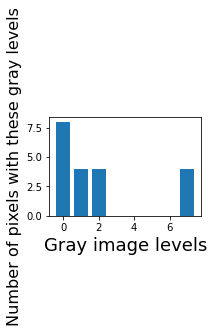

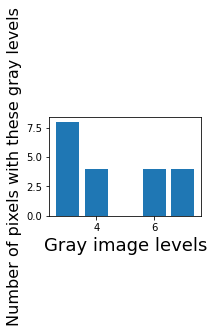

In [49]:
plt.subplot(221), histogram(imagem)
plt.subplot(222), histogram(imagem_equa)
plt.show()

# PLOTANDO IMAGEM E IMAGEM EQUALIZADA

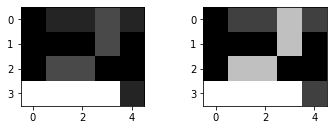

In [51]:
plt.subplot(221), plt.imshow(imagem, 'gray')
plt.subplot(222), plt.imshow(imagem_equa, 'gray')
plt.show()

# [10] Com base no modelo desejado a seguir, fazer o histograma (gráfico) especificado (Apresentar os cálculos).

In [52]:
imagem2 = np.array([[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0],[7,7,7,7,7]])

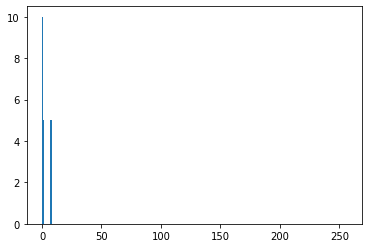

In [53]:
plt.hist(imagem2.ravel(),256,[0,256]); plt.show()

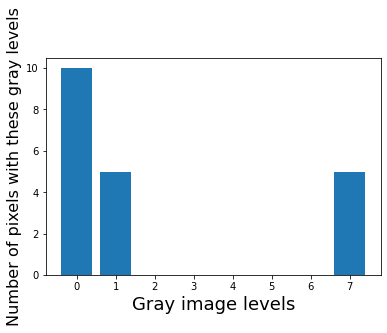

In [55]:
histogram(imagem2)